In [ ]:
!pip install pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.3 MB/s 
     |████████████████████████████████| 6.1 MB 41.6 MB/s 
     |████████████████████████████████| 11.9 MB 18.0 MB/s 
     |████████████████████████████████| 312 kB 34.4 MB/s 
     |████████████████████████████████| 92 kB 106 kB/s 
     |████████████████████████████████| 100 kB 8.2 MB/s 
     |████████████████████████████████| 132 kB 46.0 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 40 kB 5.2 MB/s 
     |████████████████████████████████| 76.6 MB 75 kB/s 
     |████████████████████████████████| 348 kB 40.7 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 305 kB 43.8 MB/s 
     |████████████████████████████████| 59.4 MB 53 kB/s 
     |████████████████████████████████| 255.9 MB 26 kB/s 
     |████████████████████████████████| 37

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
import pandas as pd

In [ ]:
file = '/content/drive/MyDrive/DataMining_Datasets/citrus.csv'
data = pd.read_csv(file)
data.tail()

,name,diameter,weight,red,green,blue
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11
9999,grapefruit,16.45,261.51,152,74,2


In [ ]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import jinja2

In [ ]:
data.shape

(10000, 6)

In [ ]:
data_set = data.sample(frac = 0.90, random_state=786)
data_unseen = data.drop(data_set.index)

#data.reset_index(inplace=True, drop=True)
#data_unseen.reset_index(inplace = True, drop = True)

print("data for modelling "+str(data_set.shape))
print("unseen data for predictions "+str(data_unseen.shape))

data for modelling (9000, 6)
unseen data for predictions (1000, 6)


In [ ]:
from pycaret.classification import *

In [ ]:
binary_cluster = setup(data = data_set, target = 'name', session_id=2,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, 
                  multicollinearity_threshold = 0.95,
                  group_features = ['red', 'green', 'blue'],
                  log_experiment = True, experiment_name = 'orangevsgrapefruit')

,Description,Value
0,session_id,2
1,Target,name
2,Target Type,Binary
3,Label Encoded,"grapefruit: 0, orange: 1"
4,Original Data,"(9000, 6)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/09/08 06:32:48 INFO mlflow.tracking.fluent: Experiment with name 'orangevsgrapefruit' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='name',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                          

In [ ]:
top3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9230,0.9788,0.9268,0.9208,0.9237,0.8460,0.8461,0.495
ridge,Ridge Classifier,0.9228,0.0000,0.9281,0.9194,0.9237,0.8457,0.8458,0.021
lda,Linear Discriminant Analysis,0.9228,0.9788,0.9281,0.9194,0.9237,0.8457,0.8458,0.024
gbc,Gradient Boosting Classifier,0.9225,0.9768,0.9249,0.9215,0.9231,0.8450,0.8451,0.610
rf,Random Forest Classifier,0.9190,0.9735,0.9199,0.9194,0.9196,0.8381,0.8382,0.900
svm,SVM - Linear Kernel,0.9184,0.0000,0.9268,0.9128,0.9196,0.8368,0.8372,0.027
ada,Ada Boost Classifier,0.9181,0.9746,0.9221,0.9158,0.9189,0.8362,0.8363,0.265
lightgbm,Light Gradient Boosting Machine,0.9148,0.9755,0.9145,0.9160,0.9152,0.8295,0.8295,0.204
et,Extra Trees Classifier,0.9124,0.9712,0.9123,0.9136,0.9128,0.8247,0.8249,0.709
nb,Naive Bayes,0.9117,0.9722,0.9139,0.9112,0.9125,0.8235,0.8236,0.021


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2, solver='auto',
                tol=0.001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)]
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
type(top3)
print(top3)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2, solver='auto',
                tol=0.001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)]


In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.9817,0.9243,0.9214,0.9228,0.8444,0.8444
1,0.9206,0.9772,0.9306,0.9133,0.9219,0.8412,0.8414
2,0.9222,0.9802,0.9117,0.9323,0.9219,0.8445,0.8447
3,0.9397,0.9806,0.9432,0.9373,0.9403,0.8794,0.8794
4,0.9175,0.9733,0.9243,0.9128,0.9185,0.8349,0.8350
5,0.9206,0.9789,0.9243,0.9185,0.9214,0.8413,0.8413
6,0.9238,0.9783,0.9211,0.9270,0.9241,0.8476,0.8476
7,0.9270,0.9787,0.9338,0.9221,0.9279,0.8540,0.8540
8,0.9222,0.9775,0.9180,0.9268,0.9223,0.8444,0.8445


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
dt = create_model('dt', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8817,0.8817,0.8864,0.8795,0.8830,0.7635,0.7635
1,0.8794,0.8794,0.8770,0.8825,0.8797,0.7587,0.7587
2,0.8659,0.8659,0.8644,0.8685,0.8664,0.7317,0.7318
3,0.8786,0.8786,0.8754,0.8824,0.8789,0.7571,0.7572
4,0.8809,0.8808,0.8926,0.8733,0.8828,0.7617,0.7619
Mean,0.8773,0.8773,0.8791,0.8772,0.8782,0.7546,0.7546
Std,0.0058,0.0058,0.0097,0.0055,0.0061,0.0116,0.0116


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
rf = create_model('rf', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.91,0.98,0.91,0.91,0.91,0.83,0.83
1,0.91,0.97,0.92,0.90,0.91,0.82,0.82
2,0.92,0.98,0.91,0.93,0.92,0.84,0.84
3,0.93,0.97,0.93,0.94,0.93,0.86,0.86
4,0.91,0.97,0.91,0.90,0.91,0.82,0.82
5,0.92,0.97,0.92,0.92,0.92,0.85,0.85
6,0.92,0.97,0.92,0.91,0.92,0.83,0.83
7,0.93,0.98,0.91,0.94,0.93,0.85,0.85
8,0.92,0.97,0.91,0.92,0.92,0.83,0.83


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9175,0.9795,0.9180,0.9180,0.9180,0.8349,0.8349
1,0.9159,0.9754,0.9338,0.9024,0.9178,0.8317,0.8322
2,0.9222,0.9736,0.9211,0.9241,0.9226,0.8444,0.8444
3,0.9349,0.9770,0.9338,0.9367,0.9352,0.8698,0.8698
4,0.9079,0.9703,0.9085,0.9085,0.9085,0.8159,0.8159
5,0.9238,0.9751,0.9243,0.9243,0.9243,0.8476,0.8476
6,0.9222,0.9742,0.9274,0.9188,0.9231,0.8444,0.8445
7,0.9159,0.9735,0.9243,0.9099,0.9171,0.8317,0.8318
8,0.9111,0.9744,0.9148,0.9091,0.9119,0.8222,0.8222


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0005, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5032,0.5000,1.0000,0.5032,0.6695,0.0000,0.0000
1,0.5032,0.8616,1.0000,0.5032,0.6695,0.0000,0.0000
2,0.5032,0.5000,1.0000,0.5032,0.6695,0.0000,0.0000
3,0.5032,0.8806,1.0000,0.5032,0.6695,0.0000,0.0000
4,0.5032,0.5000,1.0000,0.5032,0.6695,0.0000,0.0000
5,0.5032,0.5000,1.0000,0.5032,0.6695,0.0000,0.0000
6,0.5032,0.5000,1.0000,0.5032,0.6695,0.0000,0.0000
7,0.8571,0.8692,0.8991,0.8309,0.8636,0.7141,0.7166
8,0.8651,0.8704,0.9054,0.8392,0.8710,0.7300,0.7323


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=4, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.3, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.9713,0.9148,0.9295,0.9221,0.8445,0.8446
1,0.9143,0.9612,0.9148,0.9148,0.9148,0.8286,0.8286
2,0.9159,0.9646,0.8927,0.9371,0.9144,0.8318,0.8327
3,0.9159,0.9577,0.9022,0.9286,0.9152,0.8318,0.8321
4,0.9000,0.9531,0.8959,0.9045,0.9002,0.8000,0.8000
5,0.9048,0.9573,0.8864,0.9213,0.9035,0.8096,0.8102
6,0.8937,0.9626,0.8833,0.9032,0.8931,0.7873,0.7875
7,0.9143,0.9670,0.8991,0.9283,0.9135,0.8286,0.8290
8,0.9159,0.9629,0.9054,0.9258,0.9155,0.8318,0.8320


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [ ]:
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=2,
   

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8984,0.8984,0.8959,0.9016,0.8987,0.7968,0.7968
1,0.8825,0.8825,0.8927,0.8762,0.8844,0.7650,0.7652
2,0.9016,0.9017,0.8896,0.9126,0.9010,0.8032,0.8035
3,0.8810,0.8809,0.8896,0.8758,0.8826,0.7619,0.7620
4,0.8714,0.8715,0.8612,0.8806,0.8708,0.7429,0.7431
5,0.8794,0.8794,0.8770,0.8825,0.8797,0.7587,0.7587
6,0.8619,0.8621,0.8391,0.8808,0.8595,0.7239,0.7247
7,0.8889,0.8888,0.8959,0.8847,0.8903,0.7778,0.7778
8,0.8810,0.8809,0.8896,0.8758,0.8826,0.7619,0.7620


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fracti

In [ ]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9143,0.9763,0.9085,0.9201,0.9143,0.8286,0.8286
1,0.9063,0.9699,0.9211,0.8957,0.9082,0.8127,0.8130
2,0.9127,0.9715,0.9022,0.9226,0.9123,0.8254,0.8256
3,0.9270,0.9681,0.9148,0.9385,0.9265,0.8540,0.8543
4,0.9048,0.9628,0.9085,0.9028,0.9057,0.8095,0.8095
5,0.9175,0.9672,0.9211,0.9154,0.9182,0.8349,0.8349
6,0.9079,0.9668,0.9180,0.9009,0.9094,0.8158,0.8160
7,0.9222,0.9688,0.9148,0.9295,0.9221,0.8445,0.8446
8,0.9206,0.9699,0.9117,0.9293,0.9204,0.8413,0.8414


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                     

In [ ]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,{}
criterion,entropy
max_depth,5
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0005
min_impurity_split,None


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr2 = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Creating Dashboard logs
INFO:logs:Model: Light Gradient Boosting Machine
INFO:logs:logged params: {'boosting_type': 'gbdt', 'class_weight':

In [ ]:
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr2], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9127,0.9787,0.9085,0.9172,0.9128,0.8254,0.8254
1,0.9095,0.9749,0.9211,0.9012,0.9111,0.8190,0.8192
2,0.9286,0.9790,0.9085,0.9474,0.9275,0.8572,0.8579
3,0.9254,0.9771,0.9306,0.9219,0.9262,0.8508,0.8508
4,0.8921,0.9677,0.8864,0.8978,0.8921,0.7841,0.7842
5,0.9048,0.9739,0.9022,0.9079,0.9051,0.8095,0.8095
6,0.9063,0.9731,0.8927,0.9188,0.9056,0.8127,0.8131
7,0.9206,0.9765,0.9274,0.9159,0.9216,0.8413,0.8413
8,0.9079,0.9746,0.9085,0.9085,0.9085,0.8159,0.8159


INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=2, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='

In [ ]:
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr2], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9159,0.0,0.9148,0.9177,0.9163,0.8317,0.8317
1,0.9095,0.0,0.9180,0.9037,0.9108,0.8190,0.8191
2,0.9111,0.0,0.8991,0.9223,0.9105,0.8222,0.8225
3,0.9317,0.0,0.9306,0.9335,0.9321,0.8635,0.8635
4,0.9127,0.0,0.9148,0.9119,0.9134,0.8254,0.8254
5,0.9159,0.0,0.9243,0.9099,0.9171,0.8317,0.8318
6,0.9048,0.0,0.8959,0.9132,0.9045,0.8095,0.8097
7,0.9206,0.0,0.9274,0.9159,0.9216,0.8413,0.8413
8,0.9222,0.0,0.9148,0.9295,0.9221,0.8445,0.8446


INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=2, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='

In [ ]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9206,0.0,0.9211,0.9211,0.9211,0.8413,0.8413
1,0.9175,0.0,0.9338,0.9052,0.9193,0.8349,0.8353
2,0.9190,0.0,0.9117,0.9263,0.9189,0.8381,0.8382
3,0.9381,0.0,0.9432,0.9344,0.9388,0.8762,0.8762
4,0.9143,0.0,0.9243,0.9071,0.9156,0.8285,0.8287
5,0.9238,0.0,0.9306,0.9190,0.9248,0.8476,0.8477
6,0.9206,0.0,0.9211,0.9211,0.9211,0.8413,0.8413
7,0.9254,0.0,0.9338,0.9193,0.9264,0.8508,0.8509
8,0.9190,0.0,0.9148,0.9236,0.9192,0.8381,0.8381


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=2, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('ridge',
                              RidgeClassifier(alpha=1.0, class_weight=None,
                                              copy_X=True, fi

In [ ]:
print(blender_top3.estimators_)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2, solver='auto',
                tol=0.001), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)]


In [ ]:
stack_soft = stack_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.9814,0.9211,0.9241,0.9226,0.8444,0.8444
1,0.9159,0.9776,0.9274,0.9074,0.9173,0.8317,0.8319
2,0.9190,0.9804,0.9117,0.9263,0.9189,0.8381,0.8382
3,0.9381,0.9807,0.9432,0.9344,0.9388,0.8762,0.8762
4,0.9127,0.9736,0.9243,0.9043,0.9142,0.8254,0.8256
5,0.9206,0.9794,0.9274,0.9159,0.9216,0.8413,0.8413
6,0.9206,0.9792,0.9180,0.9238,0.9209,0.8413,0.8413
7,0.9270,0.9786,0.9338,0.9221,0.9279,0.8540,0.8540
8,0.9206,0.9771,0.9148,0.9265,0.9206,0.8413,0.8413


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 17
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lr',
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter=1000,
                                                   multi_class='auto',
                                                   n_jobs=None, penalty='l2',
                                                   random_state=2,
                                                   solver='lbfgs', tol=0.0001,
                                                   verbose=0,
                                                   warm_start=False)),
                             

In [ ]:
#xgboost = create_model('xgboost')
#stack_soft2 = stack_models(top3, meta_model=xgboost)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=xgboost, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=True, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


ValueError: ignored

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires matplotlib<3.6,>=3.2, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.55 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.


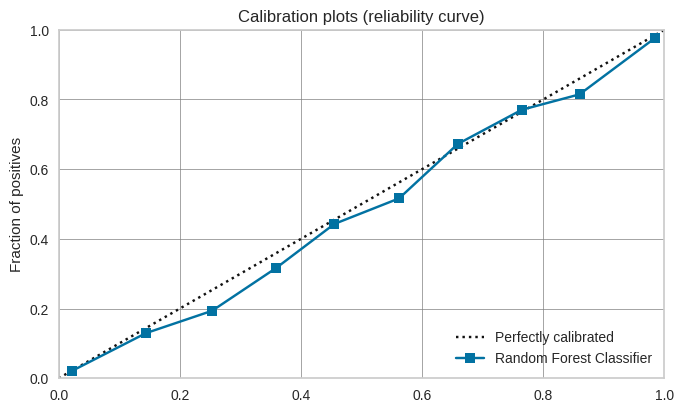

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(rf, plot='calibration')

In [ ]:
calibrated_rf = calibrate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9159,0.9788,0.9180,0.9151,0.9165,0.8317,0.8317
1,0.9222,0.9737,0.9274,0.9188,0.9231,0.8444,0.8445
2,0.9143,0.9778,0.9054,0.9228,0.9140,0.8286,0.8287
3,0.9317,0.9735,0.9243,0.9391,0.9316,0.8635,0.8636
4,0.9048,0.9685,0.9117,0.9003,0.9060,0.8095,0.8096
5,0.9190,0.9728,0.9211,0.9182,0.9197,0.8381,0.8381
6,0.9159,0.9737,0.9243,0.9099,0.9171,0.8317,0.8318
7,0.9206,0.9753,0.9180,0.9238,0.9209,0.8413,0.8413
8,0.9206,0.9750,0.9180,0.9238,0.9209,0.8413,0.8413


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 18
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

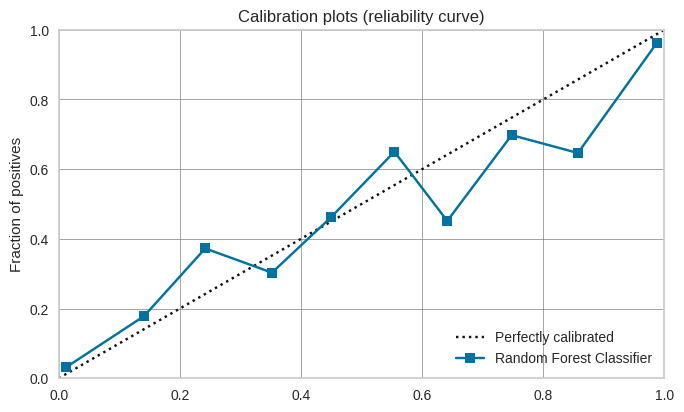

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(calibrated_rf, plot='calibration')

In [ ]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9111,0.9789,0.9117,0.9117,0.9117,0.8222,0.8222
1,0.9190,0.9736,0.9306,0.9105,0.9204,0.8381,0.8383
2,0.9143,0.9771,0.8991,0.9283,0.9135,0.8286,0.8290
3,0.9317,0.9729,0.9274,0.9363,0.9319,0.8635,0.8635
4,0.9048,0.9688,0.9085,0.9028,0.9057,0.8095,0.8095
5,0.9143,0.9734,0.9117,0.9175,0.9146,0.8286,0.8286
6,0.9159,0.9732,0.9211,0.9125,0.9168,0.8317,0.8318
7,0.9206,0.9747,0.9117,0.9293,0.9204,0.8413,0.8414
8,0.9254,0.9744,0.9148,0.9355,0.9250,0.8508,0.8510


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

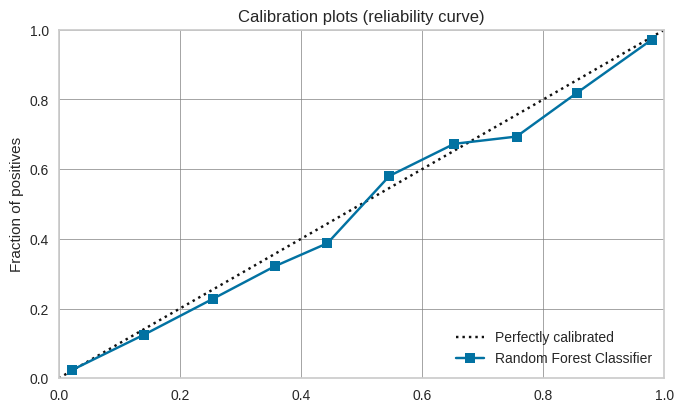

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.9814,0.9211,0.9241,0.9226,0.8444,0.8444
1,0.9159,0.9776,0.9274,0.9074,0.9173,0.8317,0.8319
2,0.9190,0.9803,0.9117,0.9263,0.9189,0.8381,0.8382
3,0.9381,0.9807,0.9432,0.9344,0.9388,0.8762,0.8762
4,0.9143,0.9736,0.9243,0.9071,0.9156,0.8285,0.8287
5,0.9206,0.9795,0.9274,0.9159,0.9216,0.8413,0.8413
6,0.9206,0.9792,0.9180,0.9238,0.9209,0.8413,0.8413
7,0.9270,0.9786,0.9338,0.9221,0.9279,0.8540,0.8540
8,0.9206,0.9770,0.9148,0.9265,0.9206,0.8413,0.8413


INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


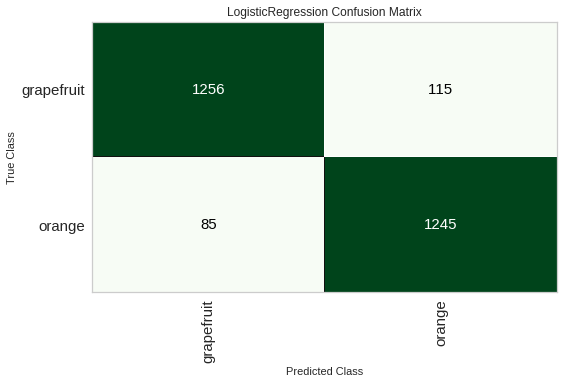

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(lr, plot = 'confusion_matrix')

In [ ]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9222,0.9813,0.9211,0.9241,0.9226,0.8444,0.8444
1,0.9159,0.9775,0.9274,0.9074,0.9173,0.8317,0.8319
2,0.9190,0.9804,0.9117,0.9263,0.9189,0.8381,0.8382
3,0.9381,0.9808,0.9432,0.9344,0.9388,0.8762,0.8762
4,0.9143,0.9735,0.9243,0.9071,0.9156,0.8285,0.8287
5,0.9206,0.9795,0.9274,0.9159,0.9216,0.8413,0.8413
6,0.9206,0.9792,0.9180,0.9238,0.9209,0.8413,0.8413
7,0.9286,0.9786,0.9338,0.9250,0.9294,0.8571,0.8572
8,0.9206,0.9770,0.9148,0.9265,0.9206,0.8413,0.8413


INFO:logs:create_model_container: 33
INFO:logs:master_model_container: 33
INFO:logs:display_container: 21
INFO:logs:LogisticRegression(C=0.55, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_lr)

LogisticRegression(C=0.55, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


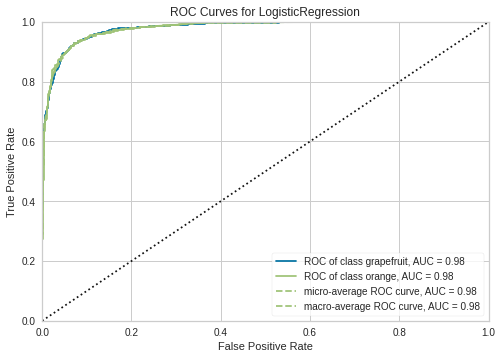

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot = 'auc')

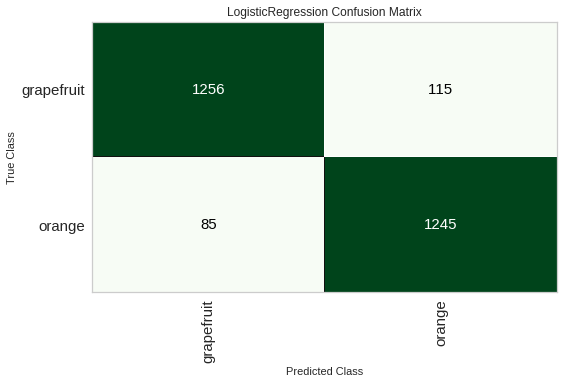

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot = 'confusion_matrix')

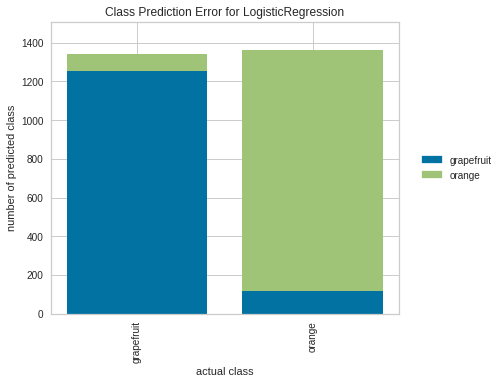

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot='error')

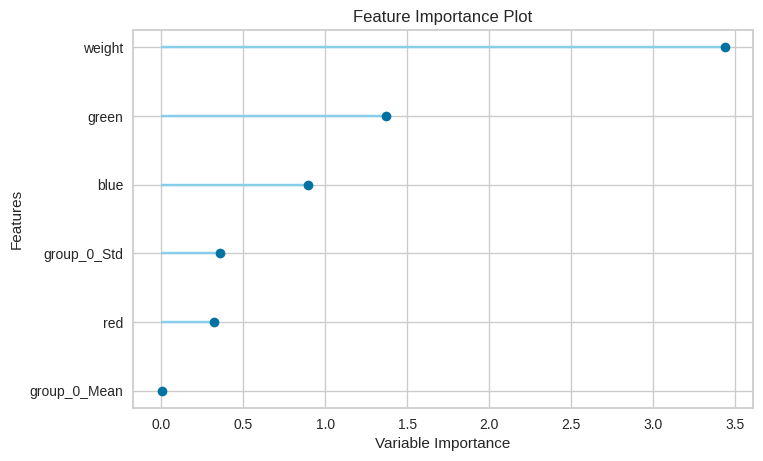

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lr, plot='feature')

In [ ]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=Recall, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=DummyClassifier(constant=None, random_state=2, strategy='prior'), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Declaring custom model
INFO:logs:Dummy Classifier Imported succesfully
INFO:logs:Cross validation set to False
INFO:logs:Fitting Model
INFO:logs:DummyClassifier(constant=None, random_state=2, strategy='prior')
IN

DummyClassifier(constant=None, random_state=2, strategy='prior')

In [ ]:
pred_body_perf = predict_model(tuned_lr, data = data_unseen)
pred_body_perf.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.55, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.9861,0,0,0,0,0


,name,diameter,weight,red,green,blue,Label,Score
5,orange,4.59,95.86,142,100,2,orange,1.0000
18,orange,4.97,104.01,168,79,22,orange,0.9997
37,orange,5.35,107.01,158,97,2,orange,1.0000
39,orange,5.37,107.64,178,92,7,orange,1.0000
57,orange,5.53,110.40,169,76,3,orange,0.9999


In [ ]:
save_model(tuned_lr,'Binary classification model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=0.55, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=Binary classification model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='name',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='name',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                        target_variable='name',
                                        threshold=0.95)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.55, class_w

In [ ]:
new_prediction = predict_model(tuned_lr, data = data_unseen)
new_prediction.head()
new_prediction.tail()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=0.55, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0,0.9861,0,0,0,0,0


,name,diameter,weight,red,green,blue,Label,Score
9979,grapefruit,14.67,244.78,163,62,2,grapefruit,0.9997
9980,grapefruit,14.67,245.14,138,83,26,grapefruit,1.0000
9982,grapefruit,14.74,246.21,139,58,15,grapefruit,1.0000
9987,grapefruit,14.88,249.58,159,67,11,grapefruit,0.9999
9999,grapefruit,16.45,261.51,152,74,2,grapefruit,0.9999


In [ ]:
from pycaret.utils import check_metric
check_metric(new_prediction['name'], new_prediction['Label'], metric = 'Accuracy')

0.941